The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.duplicated().sum()

2

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.shape

(299, 9)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

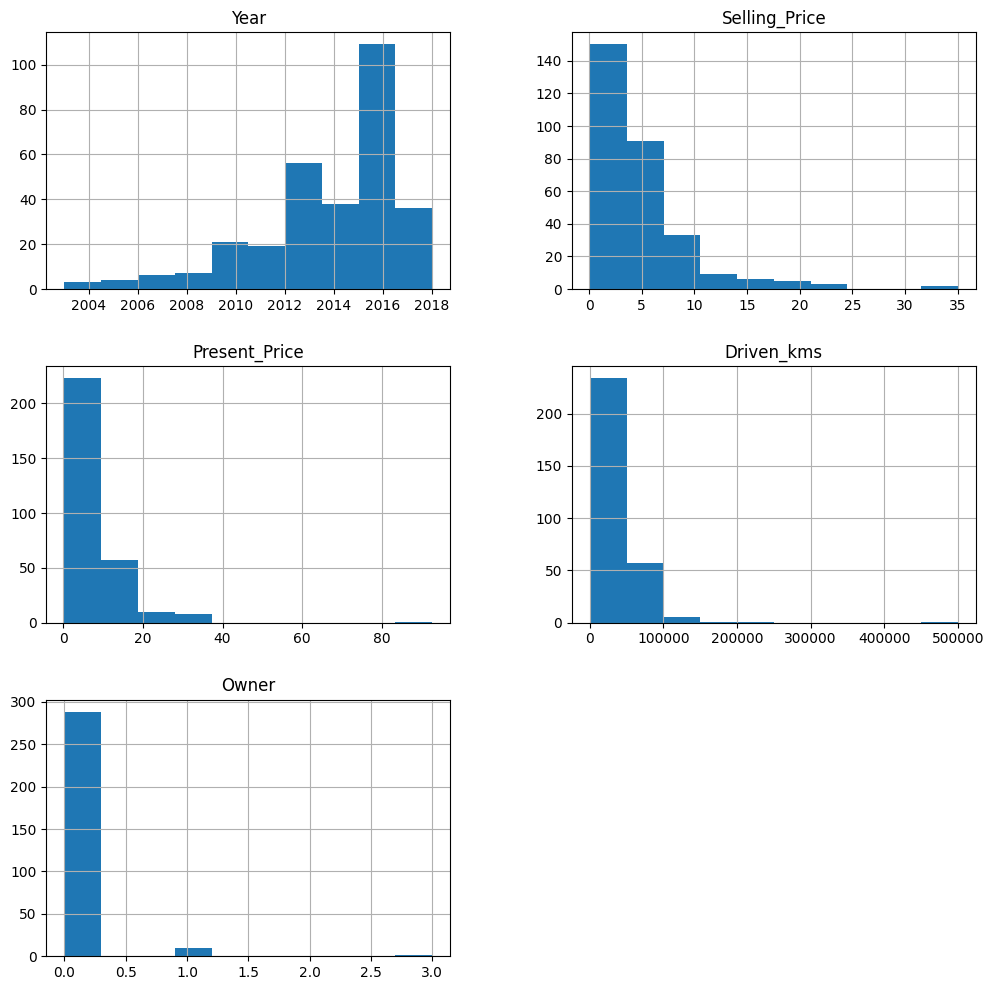

In [15]:
df.hist(figsize=(12,12))

In [16]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

numerical_df = df[numerical_columns]

corr_matrix = numerical_df.corr()

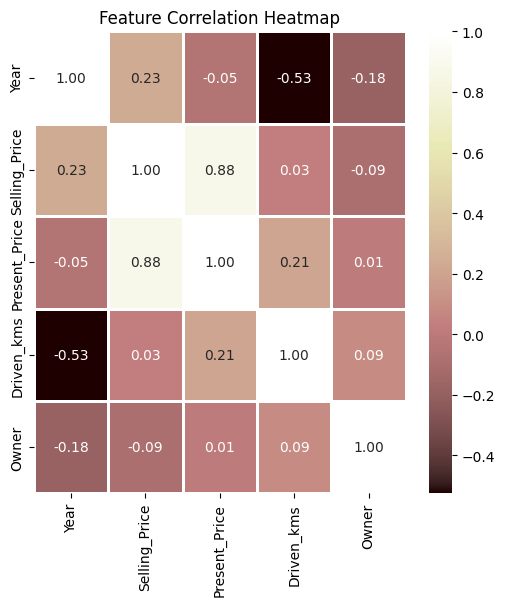

In [18]:
corr_matrix
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='pink',  linewidths=1,fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [19]:
df['Car_Age'] = 2024 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [20]:
df['Selling_type'].value_counts()

Dealer        193
Individual    106
Name: Selling_type, dtype: int64

In [22]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [23]:
df['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [40]:
ordinal_map = {'CNG':2,'Diesel':1,'Petrol':0}
df['Fuel_Type'] = df['Fuel_Type'].map(ordinal_map)
df['Fuel_Type'] = df['Fuel_Type'].astype('int64')

In [41]:
df = pd.get_dummies(df, columns = ['Selling_type','Transmission'])

In [ ]:
bool_columns = ['Selling_type_Dealer','Selling_type_Individual', 'Transmission_Automatic', 'Transmission_Manual']

df[bool_columns] = df[bool_columns].astype('int64')

In [42]:
df.shape

(299, 12)

In [43]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Car_Age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,10,1,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,11,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,7,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,13,1,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,10,1,0,0,1


In [44]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [45]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Owner,Car_Age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,10,1,0,0,1
1,2013,9.54,43000,1,0,11,1,0,0,1
2,2017,9.85,6900,0,0,7,1,0,0,1
3,2011,4.15,5200,0,0,13,1,0,0,1
4,2014,6.87,42450,1,0,10,1,0,0,1


In [46]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluation(y, predictions):
    return {
        'MAE': mean_absolute_error(y, predictions),
        'MSE': mean_squared_error(y, predictions),
        'RMSE': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

model_name = "LinearRegression"
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

evaluation_results_l = evaluation(y_test, predictions)
evaluation_results_l["Model"] = model_name

models = pd.DataFrame([evaluation_results_l])
print("Evaluation Results for", model_name)
print('-' * 30)
for metric, value in evaluation_results_l.items():
    print(f"{metric}: {value}")

Evaluation Results for LinearRegression
------------------------------
MAE: 1.5408119549692971
MSE: 6.675444100492621
RMSE: 2.583688081114402
R-squared: 0.7409934356413399
Model: LinearRegression
